In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
def average_values(df, cols, val_name):
    d = df.groupby(cols)[val_name].mean().reset_index(name='mean_val')
    assert len(d) == len(df[cols].drop_duplicates())
    return d

def create_matrix(df, n_rows, n_cols, row_name, col_name, val_name):
    avg_df = average_values(df, [row_name, col_name], val_name)
    arr = np.zeros((n_rows, n_cols))
    row = avg_df[row_name].to_numpy()
    col = avg_df[col_name].to_numpy()
    val = avg_df['mean_val'].to_numpy()
    arr[row, col] = val
    return arr

def new_create_heatmap(write_fn, df, val_name):
    plt.clf()
    n_samples = df.sample_id.nunique()
    n_drugs = df.drug_id.nunique()
    arr = create_matrix(df, n_samples, n_drugs, 'sample_id', 'drug_id', val_name)
    sns.heatmap(arr)
    plt.title(val_name)
    plt.ylabel('sample_id')
    plt.xlabel('drug_id')
    if write_fn:
        plt.savefig(write_fn, bbox_inches='tight')
    plt.show()
    return arr

def sorted_heatmap(df, val_name):
    arr = new_create_heatmap(None, df, val_name)
    n_rows = arr.shape[0]
    n_cols = arr.shape[1]
    col_zeros = np.sum(arr == 0, axis=0)
    sorted_col_idx = np.argsort(col_zeros)
    row_zeros = np.sum(arr == 0, axis=1)
    sorted_row_idx = np.argsort(row_zeros)
    barr = arr[:, sorted_col_idx]
    barr = barr[sorted_row_idx, :]
    sns.heatmap(barr)
    return barr

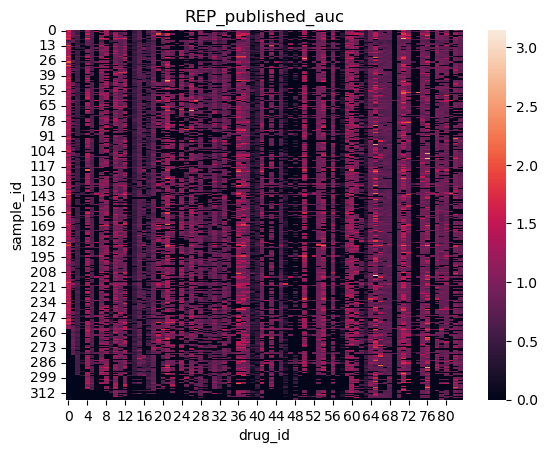

In [30]:
df = pd.read_csv('~/Documents/research/tansey/msk_intern/pyro_model/data/rep-gdsc-ctd2-pub.csv')
arr = new_create_heatmap(None, df, 'REP_published_auc')

In [31]:
n_rows = a.shape[0]
n_cols = a.shape[1]
col_zeros = np.sum(arr == 0, axis=0)
sorted_idx = np.argsort(col_zeros)
sorted_idx

array([68, 18, 66, 14, 67, 15, 76, 75, 37, 80, 53, 65, 70, 38,  2, 64, 11,
       72,  5, 10,  7, 36, 56, 71, 45, 41, 59,  0, 54, 79, 40, 60, 39, 63,
       17, 32, 21, 78, 50, 26, 28, 83, 31, 33, 12,  4, 46, 20, 43, 82, 30,
        8, 61, 58, 24, 22, 34, 25, 27, 16,  1, 29, 62, 19,  9, 48, 81, 49,
       55, 35,  3, 74, 52, 57, 13, 47, 42,  6, 44, 23, 51, 77, 73, 69])

In [32]:
barr = arr[:, sorted_idx]

<Axes: >

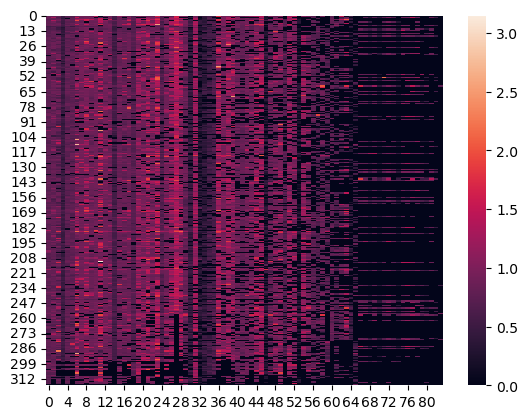

In [33]:
sns.heatmap(barr)

<Axes: >

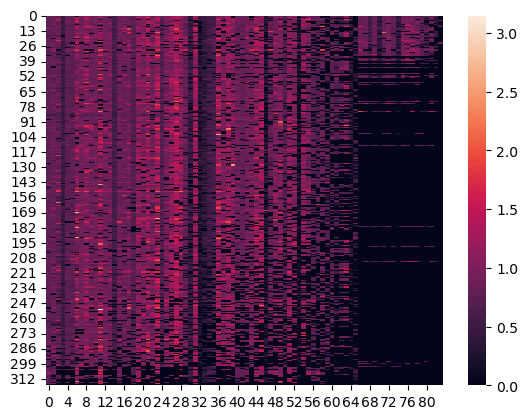

In [34]:
row_zeros = np.sum(arr == 0, axis=1)
sorted_row_idx = np.argsort(row_zeros)
carr = arr[:, sorted_idx]
carr = carr[sorted_row_idx, :]
sns.heatmap(carr)

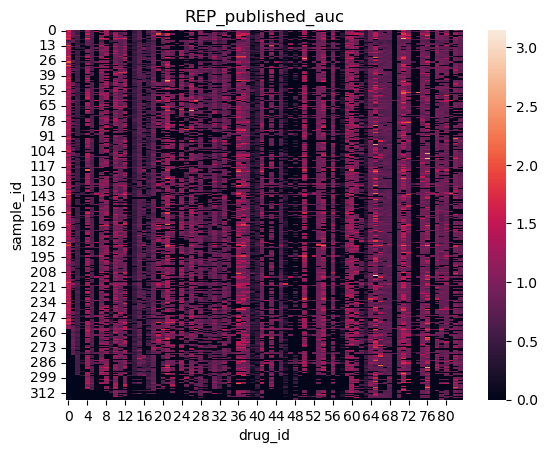

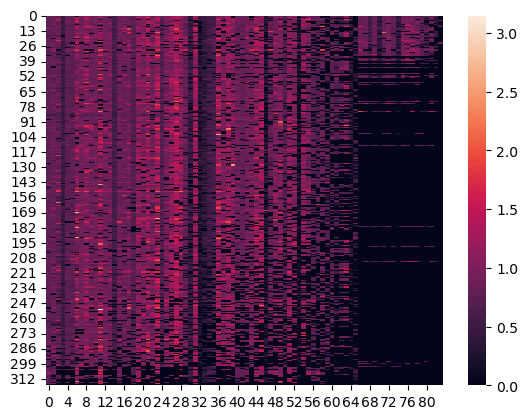

In [37]:
arr = sorted_heatmap(df, 'REP_published_auc')